<a href="https://colab.research.google.com/github/WSzymczak23/projekty-SDA/blob/main/Regresja_jednej_zmiennej.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("portland_housing.csv")

In [ ]:
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
X = df[['Size']]
y = df['Price']

In [ ]:
X.values[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]])

In [ ]:
y.values

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.intercept_

71270.49244872917

In [ ]:
model.coef_

array([134.52528772])

In [ ]:
# intercept_ -> theta_0
# coef -> theta_1

In [ ]:
model.coef_[0]

134.5252877202413

In [ ]:
predict_data = np.array([[3200], [3720]]) # prognozujemy sobie ceny dla domów o powierzchni 3200 i 3720

In [ ]:
predict_data

array([[3200],
       [3720]])

In [ ]:
model.predict(predict_data)

array([501751.4131535 , 571704.56276803])

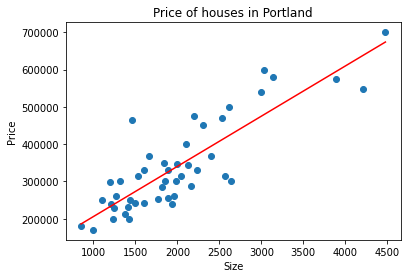

In [ ]:
theta_0 = model.intercept_
theta_1 = model.coef_[0]

x = np.linspace(min(X.values), max(X.values), 100)

pred = theta_0 + theta_1*x

plt.scatter(X, y)
plt.plot(x, pred, 'r')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Price of houses in Portland')
plt.show()

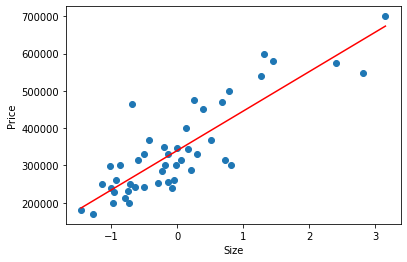

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)


model2 = SGDRegressor()
model2.fit(scaled_X, y)

theta_0_m2 = model2.intercept_
theta_1_m2 = model2.coef_[0]

x = np.linspace(min(scaled_X), max(scaled_X), 100)
pred2 = model2.predict(x)

plt.scatter(scaled_X, y)
plt.plot(x, pred2, 'r')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=267)

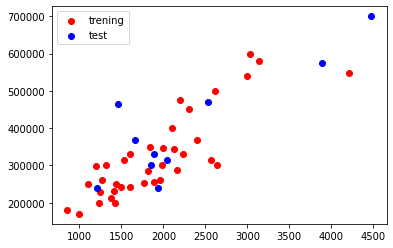

In [ ]:
plt.scatter(X_train, y_train, c='r', label='trening')
plt.scatter(X_test, y_test, c='b', label='test')
plt.legend()

In [ ]:
print(X.shape, y.shape)

(47, 1) (47,)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37, 1) (37,)
(10, 1) (10,)


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = model.predict(X)

In [ ]:
r2_score(y, y_predict)

0.7310037839755306

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y, y_predict)

52004.81399860769

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y, y_predict, squared=False)

64158.12872010906

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes = [1, 10, 20, 30, 37]

train_sizes, train_scores, validation_scores = learning_curve(estimator=LinearRegression(),
                                                             X= X,
                                                             y=y,
                                                             train_sizes=train_sizes,
                                                             cv=5,
                                                             scoring = 'neg_mean_squared_error')

In [ ]:
train_scores

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-2.87305291e+09, -1.42343917e+09, -1.42343917e+09,
        -1.42343917e+09, -1.42343917e+09],
       [-6.12549028e+09, -5.30647367e+09, -2.28116376e+09,
        -2.28116376e+09, -2.28116376e+09],
       [-5.03687424e+09, -4.32816315e+09, -3.05414445e+09,
        -4.50656411e+09, -4.72340668e+09],
       [-4.68168459e+09, -4.04548641e+09, -3.29013443e+09,
        -4.45541666e+09, -4.05460773e+09]])

In [ ]:
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

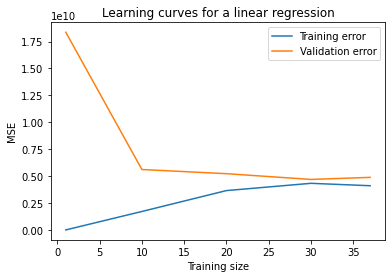

In [ ]:
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.xlabel('Training size')
plt.ylabel('MSE')
plt.title('Learning curves for a linear regression')
plt.legend()